In [2]:
%pip install scikit-learn
%pip install xgboost 
%pip install tpot  


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------  1.0/1.1 MB 6.3 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 5.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 5.7 MB/s eta 0:00

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


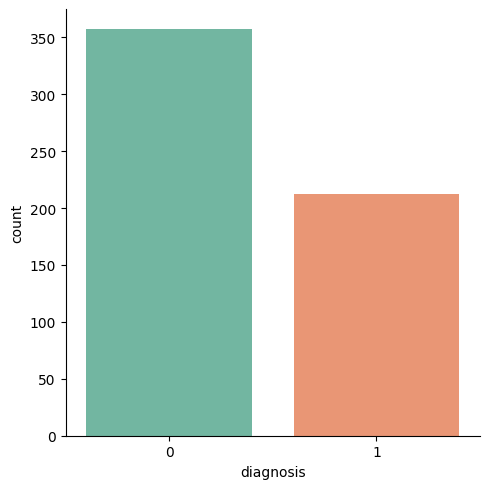

Model: Logistic Regression, Cross-Validation Accuracy: 0.9195
Model: Random Forest, Cross-Validation Accuracy: 0.9094
Model: SVM, Cross-Validation Accuracy: 0.9195

Tuning hyperparameters for Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}

Tuning hyperparameters for Random Forest...
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Tuning hyperparameters for SVM...
Best Hyperparameters for SVM: {'C': 100, 'kernel': 'linear'}

Logistic Regression Test Accuracy: 0.9532
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Random Forest Test Accuracy: 0.9649
              precision    recall  f1-score   support

 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv("data.csv")

# doing the pre-processing
df["diagnosis"] = df["diagnosis"].replace({"M": 1, "B": 0})
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Selected features based on the Sweetviz analysis
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

X = df[selected_features]
y = df['diagnosis']

#Training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# we are defining the models to compare here
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train each model and get the data accuracy
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Model: {model_name}, Cross-Validation Accuracy: {scores.mean():.4f}")

# Define hyperparameters for tuning each model using GridSearchCV
param_grid = {
    "Logistic Regression": {
        'C': [0.1, 1.0, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1.0, 10, 100],
        'kernel': ['linear', 'rbf']
    }
}

# Perform GridSearchCV to find the best hyperparameters for each model
best_models = {}
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



AutoML Using TPOT

In [4]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize TPOT AutoML Classifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=42, scoring='accuracy')

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate TPOT on the test data
accuracy = tpot.score(X_test, y_test)
print(f"AutoML Model Accuracy: {accuracy:.4f}")

# Export the best pipeline found by TPOT
tpot.export('best_model_pipeline.py')


c:\Users\Purushotham Kilari\.conda\envs\myenv\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9246202531645569

Generation 2 - Current best internal CV score: 0.9246202531645569

Generation 3 - Current best internal CV score: 0.9246202531645569

Generation 4 - Current best internal CV score: 0.9270569620253164

Generation 5 - Current best internal CV score: 0.9270569620253164

Best pipeline: GradientBoostingClassifier(ZeroCount(input_matrix), learning_rate=0.1, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=10, min_samples_split=7, n_estimators=100, subsample=0.9000000000000001)
AutoML Model Accuracy: 0.9766
